In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
sigma = 50 #IFT, dyne/cm

phi_lab = 0.16
k_lab = 80

phi_res = 0.19 #porosity
k_res = 120 #md

pc_lab = {'Sw': [1.0, 0.8, 0.6, 0.4, 0.25, 0.23, 0.21, 0.20],
      'Pc_lab': [0.5, 0.6, 0.75, 1.05, 1.50, 1.75, 3.0, 8.0]}

df = pd.DataFrame(pc_lab)

In [30]:
df

,Sw,Pc_lab
0,1.00,0.50
1,0.80,0.60
2,0.60,0.75
3,0.40,1.05
4,0.25,1.50
5,0.23,1.75
6,0.21,3.00
7,0.20,8.00


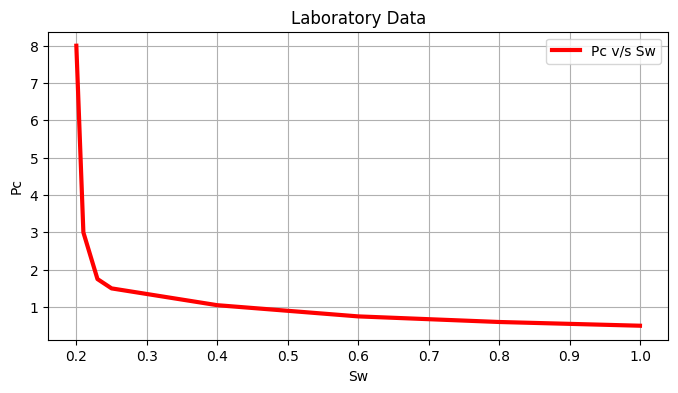

In [31]:
plt.style.use('default')

plt.figure(figsize = (8, 4))

plt.plot(df['Sw'], df['Pc_lab'], label = 'Pc v/s Sw', color = 'red', linewidth = 3)

plt.title('Laboratory Data')

plt.xlabel('Sw')
plt.ylabel('Pc')

plt.legend()
plt.grid()

Now our task is to convert this Lab Data into Reservoir Data.

Concept: Leverett J - Function.

> $ J(Sw) = 0.21645 \frac{Pc}{\sigma} sqrt(k/phi) $

In [32]:
df['J'] = 0.21645 * (df['Pc_lab'] / sigma) * (np.sqrt(k_lab / phi_lab))

In [33]:
df

,Sw,Pc_lab,J
0,1.00,0.50,0.048400
1,0.80,0.60,0.058080
2,0.60,0.75,0.072600
3,0.40,1.05,0.101639
4,0.25,1.50,0.145199
5,0.23,1.75,0.169399
6,0.21,3.00,0.290398
7,0.20,8.00,0.774395


In [34]:
df['Pc_res'] = (df['J'] * sigma) / (0.21645 * np.sqrt(k_res / phi_res))

In [35]:
df

,Sw,Pc_lab,J,Pc_res
0,1.00,0.50,0.048400,0.444878
1,0.80,0.60,0.058080,0.533854
2,0.60,0.75,0.072600,0.667317
3,0.40,1.05,0.101639,0.934244
4,0.25,1.50,0.145199,1.334635
5,0.23,1.75,0.169399,1.557074
6,0.21,3.00,0.290398,2.669270
7,0.20,8.00,0.774395,7.118052


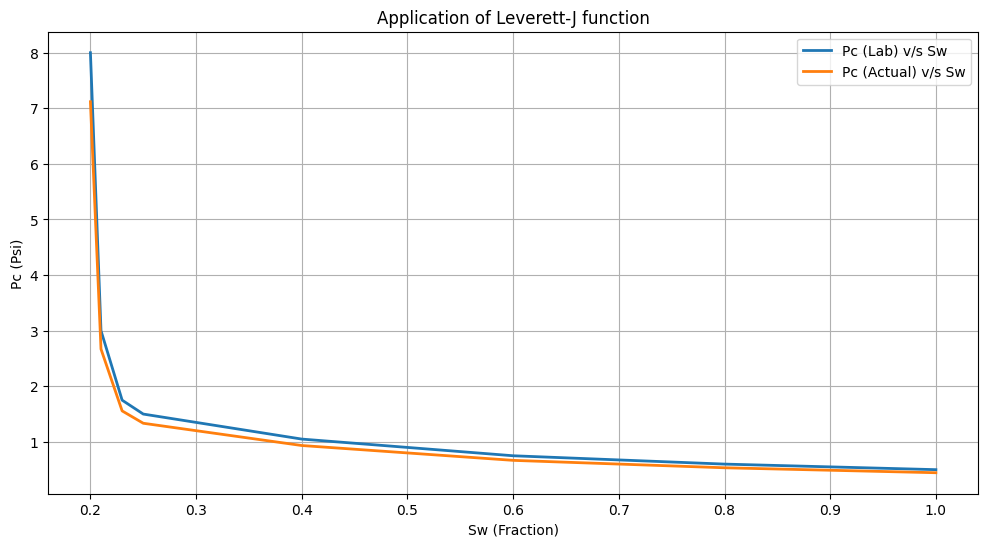

In [36]:
plt.style.use('default')

plt.figure(figsize = (12, 6))

plt.plot(df['Sw'], df['Pc_lab'], label = 'Pc (Lab) v/s Sw', linewidth = 2)
plt.plot(df['Sw'], df['Pc_res'], label = 'Pc (Actual) v/s Sw', linewidth = 2)

plt.title('Application of Leverett-J function')

plt.xlabel('Sw (Fraction)')
plt.ylabel('Pc (Psi)')

plt.legend()
plt.grid()